FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    the only cells that need edits are at the top 
    they are labled "with edit here"
    
    Hanna Bridgham 
    6/6/2022


In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq


WC_ABS_GoM21Su_ID2122 - is fucked up 

!STOPED ON PW_ID2123!


In [2]:
#EDIT HERE
####################################
# This returns a list of names (strings) of files that have the .txt extension. 
# You should provide the path
files = glob.glob('../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129/*.txt')
# You should add the path of your outputs 
path_1 = '../../../Data_Thesis/CDOM/SPECTRA/BC_ABS_GOM21SU_ID2129_Pchip_wavelenths.csv'
path_2 = "../../../Data_Thesis/CDOM/GRAPHS/BC_ABS_GOM21SU_ID2129_plot.png"
path_3 = '../../../Data_Thesis/CDOM/OUTPUTS/BC_ABS_GOM21SU_ID2129_outputs.csv'
files

['../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212941_Absorbance_16-07-28-465.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212942_Absorbance_16-09-25-649.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212943_Absorbance_16-10-58-786.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212944_Absorbance_16-12-25-887.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212945_Absorbance_16-13-46-982.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212946_Absorbance_16-15-41-124.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212947_Absorbance_16-17-48-861.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212948_Absorbance_16-19-29-585.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID2129\\BC_Abs_GoM21Su_ID212949_Absorbance_16-21-23-787.txt',
 '../../../CDOM_DATA/GOM21SU/BC_Abs_GoM21Su_ID

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 
#WG 50 #1 : 190987 : 48.9
#WG 50 #2 : 190991 : 48.75
#WG 50 #3 : 192856 : 48.8 

#WG 10 CM 182380 

#X = .489 # 50 cm lwcc number 1 SN: , Basiclly antything from GOM21SU thats not PW
#X = .4875 # 50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
#X = .488 # 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW

X = .1

#X = .01


PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [4]:
#FINAL FUNTION 
#see above for the breakdown of diff parts 
def GET_CDOM_DATA(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    #bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    #df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    #xi = np.arange(189,523,1)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [5]:
#EDIT HERE
n = 6 # how many underscore breaks 
stri = 3 # the selected underscore break 
split = 1 #spit in the file name string 

####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df

,BC_Abs_GoM21Su_ID212941_Absorbance_16-07-28-465.txt,BC_Abs_GoM21Su_ID212942_Absorbance_16-09-25-649.txt,BC_Abs_GoM21Su_ID212943_Absorbance_16-10-58-786.txt,BC_Abs_GoM21Su_ID212944_Absorbance_16-12-25-887.txt,BC_Abs_GoM21Su_ID212945_Absorbance_16-13-46-982.txt,BC_Abs_GoM21Su_ID212946_Absorbance_16-15-41-124.txt,BC_Abs_GoM21Su_ID212947_Absorbance_16-17-48-861.txt,BC_Abs_GoM21Su_ID212948_Absorbance_16-19-29-585.txt,BC_Abs_GoM21Su_ID212949_Absorbance_16-21-23-787.txt,BC_Abs_GoM21Su_ID212950_Absorbance_16-23-16-516.txt,BC_Abs_GoM21Su_ID212951_Absorbance_16-25-19-591.txt,BC_Abs_GoM21Su_ID212952_Absorbance_16-26-54-140.txt,BC_Abs_GoM21Su_ID212953_Absorbance_16-29-18-187.txt,BC_Abs_GoM21Su_ID212954_Absorbance_16-32-03-299.txt,BC_Abs_GoM21Su_ID212955_Absorbance_16-34-18-366.txt,BC_Abs_GoM21Su_ID212956_Absorbance_16-36-39-519.txt,BC_Abs_GoM21Su_ID212957_Absorbance_16-38-48-562.txt,BC_Abs_GoM21Su_ID212958_Absorbance_16-43-32-138.txt,NaClBlank_post_Absorbance_16-45-48-657.txt,NaClBlank_pre_Absorbance_16-04-32-643.txt
wl,,,,,,,,,,,,,,,,,,,,
189,0.000000,3.166625,0.000000,-9.389331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806050,0.000000,-10.395742,0.000000,9.486057,0.000000,-4.564546,0.000000
190,0.000000,3.166625,0.000000,-9.389331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806050,0.000000,-10.395742,0.000000,9.486057,0.000000,-4.564546,0.000000
191,5.186129,8.860792,8.075469,0.000000,-2.292636,1.469702,4.561094,23.900513,0.637915,6.464037,6.508276,2.573096,-1.330695,-3.192668,14.802532,-0.089817,-5.375876,0.420379,2.209464,-2.841806
192,0.000000,7.479521,0.134818,0.000000,0.399291,-0.373891,0.000000,0.496326,0.000000,27.847044,0.394912,0.310187,0.000000,0.000000,0.000000,2.529379,0.000000,-0.520624,0.000000,0.012015
193,0.000000,-0.150387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-1.149598,-1.307953,-0.993649,-1.160670,-1.191986,-1.333097,-1.126282,-1.089476,-1.284991,-1.275600,-1.308559,-1.435704,-1.478441,-1.424981,-1.417914,-1.212849,-1.393592,-1.374281,-1.112952,-0.692858
877,-1.119293,-1.276492,-1.116123,-1.173423,-1.159007,-1.372251,-1.378044,-1.339510,-1.316810,-1.631274,-1.219683,-1.380039,-1.518166,-1.498142,-1.613613,-1.602649,-1.391359,-1.314756,-1.396533,-0.707354
878,-0.858771,-1.125775,-1.147173,-0.893216,-1.115087,-0.969193,-1.165691,-1.374039,-1.208047,-1.053128,-1.055379,-1.053760,-1.036777,-1.364124,-1.456368,-1.224598,-1.152495,-1.197768,-1.132422,-0.584373


In [6]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code
names = d.columns.str.rsplit('_', n=7).str[3]
#names = names.str.rsplit('_', n=4).str[0]
#names = d.columns.str.rsplit('_', n=5).str[3]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df

,16-04-32-643.txt,16-45-48-657.txt,ID212941,ID212942,ID212943,ID212944,ID212945,ID212946,ID212947,ID212948,ID212949,ID212950,ID212951,ID212952,ID212953,ID212954,ID212955,ID212956,ID212957,ID212958
wl,,,,,,,,,,,,,,,,,,,,
189,0.000000,-4.564546,0.000000,3.166625,0.000000,-9.389331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806050,0.000000,-10.395742,0.000000,9.486057,0.000000
190,0.000000,-4.564546,0.000000,3.166625,0.000000,-9.389331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.806050,0.000000,-10.395742,0.000000,9.486057,0.000000
191,-2.841806,2.209464,5.186129,8.860792,8.075469,0.000000,-2.292636,1.469702,4.561094,23.900513,0.637915,6.464037,6.508276,2.573096,-1.330695,-3.192668,14.802532,-0.089817,-5.375876,0.420379
192,0.012015,0.000000,0.000000,7.479521,0.134818,0.000000,0.399291,-0.373891,0.000000,0.496326,0.000000,27.847044,0.394912,0.310187,0.000000,0.000000,0.000000,2.529379,0.000000,-0.520624
193,0.000000,0.000000,0.000000,-0.150387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,-0.692858,-1.112952,-1.149598,-1.307953,-0.993649,-1.160670,-1.191986,-1.333097,-1.126282,-1.089476,-1.284991,-1.275600,-1.308559,-1.435704,-1.478441,-1.424981,-1.417914,-1.212849,-1.393592,-1.374281
877,-0.707354,-1.396533,-1.119293,-1.276492,-1.116123,-1.173423,-1.159007,-1.372251,-1.378044,-1.339510,-1.316810,-1.631274,-1.219683,-1.380039,-1.518166,-1.498142,-1.613613,-1.602649,-1.391359,-1.314756
878,-0.584373,-1.132422,-0.858771,-1.125775,-1.147173,-0.893216,-1.115087,-0.969193,-1.165691,-1.374039,-1.208047,-1.053128,-1.055379,-1.053760,-1.036777,-1.364124,-1.456368,-1.224598,-1.152495,-1.197768


In [7]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
#bcorr = df[333:334].mean(axis=0) # 333:334 is 521 to 522 nm and this line takes the average 
#df = df[:] - df[333:334].mean(axis=0) # here we correct the data by that average 

bcorr = df[486:537].mean(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - df[486:537].mean(axis=0) # here we correct the data by that average 

In [8]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data['bcorr'] = bcorr
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

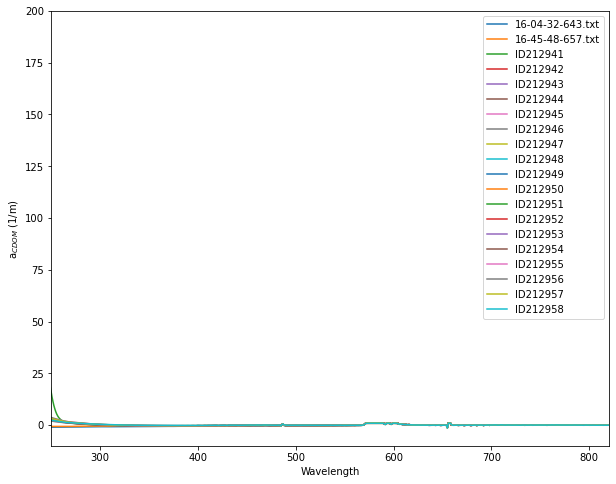

In [9]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-10,200)
ax.set_xlim(250,820)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.set_title("BC_ABS_BLU22_2226_GB")

plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [10]:
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df

In [11]:
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
frames = []
for f in files:
    df = open_file_abs_base_cor(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
names = d.columns.str.rsplit('_', n=7).str[3]
#names = names.str.rsplit('_', n=4).str[0]
#names = d.columns.str.rsplit('_', n=5).str[3]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = df.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,16-04-32-643.txt,16-45-48-657.txt,ID212941,ID212942,ID212943,ID212944,ID212945,ID212946,ID212947,ID212948,...,ID212950,ID212951,ID212952,ID212953,ID212954,ID212955,ID212956,ID212957,ID212958,wl
wl,,,,,,,,,,,,,,,,,,,,,
189.662,0.000000,-4.564546,0.000000,3.166625,0.000000,-9.389331,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.806050,0.000000,-10.395742,0.000000,9.486057,0.000000,189.662
190.044,0.000000,-4.564546,0.000000,3.166625,0.000000,-9.389331,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.806050,0.000000,-10.395742,0.000000,9.486057,0.000000,190.044
190.426,7.989107,0.000000,9.591995,0.000000,3.776920,15.830822,-2.673783,0.000000,0.000000,0.000000,...,5.614714,0.000000,20.310157,9.663388,0.000000,0.000000,0.000000,6.282584,0.000000,190.426
190.809,2.051973,3.523590,5.805863,17.721585,16.150939,0.000000,-4.585273,0.000000,0.607992,8.551039,...,12.010145,-7.558446,-0.923503,-2.077306,-4.562243,-3.606498,-0.179634,-8.300012,0.582659,190.809
191.191,-6.026951,0.000000,4.923814,0.000000,0.000000,0.000000,0.000000,3.512075,8.233225,35.995890,...,0.000000,21.047117,7.848624,0.000000,0.000000,33.211563,0.000000,0.000000,0.000000,191.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.598,-0.672476,-1.427860,-1.015623,-1.492344,-1.036350,-1.467011,-1.073198,-1.066289,-1.278165,-1.107743,...,-1.202166,-1.262044,-1.522283,-1.414042,-1.496950,-1.448587,-1.642039,-1.469314,-1.683493,880.598
880.888,-1.146894,-1.460102,-1.388709,-1.338043,-1.319619,-1.552222,-1.268953,-1.651251,-1.630524,-1.522283,...,-1.713432,-1.607494,-1.741068,-1.821673,-1.522283,-1.867733,-1.747977,-1.897672,-1.582161,880.888
881.179,-0.672476,-1.289680,-0.907382,-1.075501,-1.110046,-1.050168,-1.351861,-1.006411,-1.225196,-1.199863,...,-1.278165,-1.232105,-1.225196,-1.303498,-1.218287,-1.414042,-1.305801,-1.209075,-1.266650,881.179


In [12]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [13]:
#HERE DO THE WHOLE EXPO AS A LOOP FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


In [15]:
#HYPERBOLIC REGRESSION A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

In [16]:
Frames = []
maxfev = 1000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (1, 10, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

!!! WARNING !!! 275_700 has a bad R2 !!!
!!! WARNING !!! 275_295 has a bad R2 !!!
!!! WARNING !!! 350_400 has a bad R2 !!!


PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df[(df['wl']>=300) & (df['wl']<=400)][col]
    xdata = df[(df['wl']>=300) & (df['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df[(df['wl']>=250) & (df['wl']<=300)][col]
    ydata_r2 = df[(df['wl']>=400) & (df['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df[(df['wl']>=250) & (df['wl']<=300)]['wl']
    xdata_r2 = df[(df['wl']>=400) & (df['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

In [20]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

!!! WARNING !!! 275_700 has a bad R2 !!!


In [21]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
outputs 
#SAVE IT 
outputs.to_csv(path_3)
outputs

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,abs_440_SEM,abs_254_HM,abs_280_HM,abs_320_HM,abs_412_HM,abs_440_HM,SR_SEM,SR_HM,350_intergration
sample,,,,,,,,,,,,,,,,,,,
16-04-32-643.txt,NaN,0.032236,-0.00001,NaN,-0.006441,0.988523,-1.722058,-1.646136,-1.537675,-1.288206,-1.212279,-2.005129,-1.820924,-1.602948,-1.233574,-1.145948,-3176.960010,-0.006516,NaN
16-45-48-657.txt,NaN,0.048058,NaN,NaN,NaN,NaN,-1.395258,-1.345010,-1.273226,-1.108118,-1.057867,-1.689554,-1.520673,-1.335006,-1.055222,-0.995238,-2107.989450,-0.025492,NaN
ID212941,NaN,0.009291,NaN,NaN,-0.005604,NaN,-1.382547,-1.350351,-1.304357,-1.198576,-1.166383,-1.312838,-1.302525,-1.284002,-1.221665,-1.196463,-2003.686013,4.414555,NaN
ID212942,NaN,0.007761,NaN,NaN,-0.006663,NaN,-1.369204,-1.338979,-1.295801,-1.196496,-1.166274,-1.304991,-1.295076,-1.277345,-1.218086,-1.194247,-1857.736312,5.628451,NaN
ID212943,NaN,0.009163,NaN,NaN,-0.004965,NaN,-1.323343,-1.296307,-1.257683,-1.168852,-1.141817,-1.263933,-1.256056,-1.241607,-1.191211,-1.170314,-2136.333390,4.515214,NaN
ID212944,NaN,0.003549,NaN,NaN,-0.034352,NaN,-1.313302,-1.287199,-1.249909,-1.164145,-1.138044,-1.256272,-1.248670,-1.234718,-1.186007,-1.165795,-824.812287,32.248690,NaN
ID212945,NaN,0.009189,NaN,NaN,-0.004208,NaN,-1.340581,-1.312234,-1.271741,-1.178608,-1.150264,-1.281387,-1.271850,-1.254875,-1.198590,-1.176075,-2030.574718,3.240207,NaN
ID212946,NaN,0.010134,NaN,NaN,-0.004993,NaN,-1.360128,-1.330374,-1.287869,-1.190110,-1.160358,-1.301185,-1.290032,-1.270616,-1.208611,-1.184465,1744.752481,0.000035,NaN
ID212947,NaN,0.004984,NaN,NaN,-0.009463,NaN,-1.296871,-1.273022,-1.238951,-1.160593,-1.136745,-1.246139,-1.238969,-1.225880,-1.180593,-1.161921,-1122.632502,7.088376,NaN
